In [1]:
from src.eval import evaluate
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import ipywidgets as widgets
from IPython.display import display
%matplotlib widget
%matplotlib inline


In [2]:
predicted_labels_xr, labels_xr = evaluate("/Users/xgxtphg/Documents/git/DL4WeatherAndClimate/model/model_best_loss_0.0804_20240406-103455.pth")

INFO:src.eval:Creating Model
INFO:src.fuxi:Creating FuXi Model
INFO:src.fuxi:Creating SpaceTimeCubeEmbedding layer
INFO:src.fuxi:Creating UTransformer Layer
INFO:src.fuxi:Creating DownBlock Layer
INFO:src.fuxi:Creating UpBlock Layer
INFO:src.eval:Load Model successfully
INFO:src.eval:Creating Eval Dataset
INFO:src.eval:Creating DataLoader
Initialisierung:  97%|█████████▋| 114/117 [00:06<00:00, 17.43it/s]


0.11011011128208698
-7.269199076708116e-05
0.07762917924222976


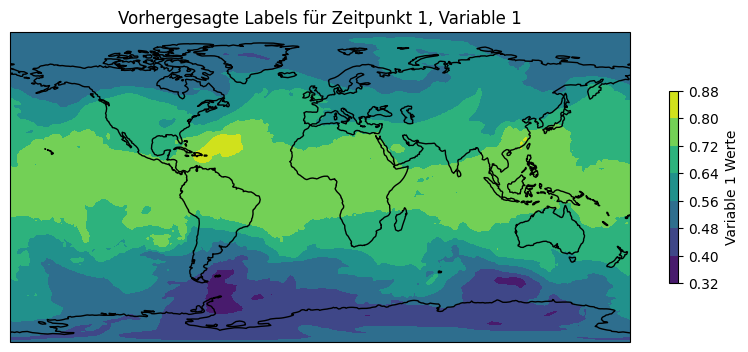

In [3]:
data_to_plot = labels_xr.sel(time=1, variables=1)

original_lat_range = [0, data_to_plot.lat.max().values]
original_lon_range = [0, data_to_plot.lon.max().values]

# Zielbereiche für Skalierung
scaled_lat_range = [-90, 90]  # Zielbereich für Latituden
scaled_lon_range = [-180, 180]  # Zielbereich für Longituden

# Funktion zur Skalierung der Koordinaten
def scale_coords(original_coords, original_range, target_range):
    scale_factor = (target_range[1] - target_range[0]) / (original_range[1] - original_range[0])
    scaled_coords = original_coords * scale_factor + target_range[0]
    return scaled_coords

# Skaliere die Koordinaten
scaled_lats = scale_coords(np.array(data_to_plot.lat), original_lat_range, scaled_lat_range)
scaled_lons = scale_coords(np.array(data_to_plot.lon), original_lon_range, scaled_lon_range)

# Nun kannst du die skalierten Koordinaten für das Plotten verwenden
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

cf = ax.contourf(scaled_lons, scaled_lats, data_to_plot,
                 transform=ccrs.PlateCarree(), cmap='viridis')

plt.colorbar(cf, ax=ax, shrink=0.5, label='Variable 1 Werte')
plt.title('Vorhergesagte Labels für Zeitpunkt 1, Variable 1')
plt.show()


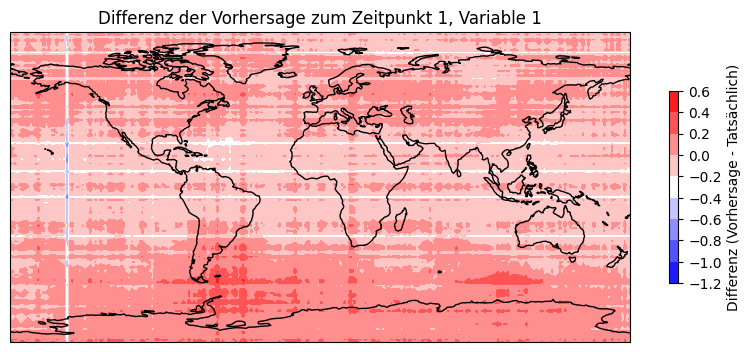

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

predicted_data = predicted_labels_xr.sel(time=1, variables=1)
actual_data = labels_xr.sel(time=1, variables=1)
data_difference = predicted_data - actual_data

# Setze die Originalbereiche basierend auf den Maximalwerten der Differenzdaten
original_lat_range = [0, data_difference.lat.max().values]
original_lon_range = [0, data_difference.lon.max().values]

# Zielbereiche für Skalierung
scaled_lat_range = [-90, 90]  # Zielbereich für Latituden
scaled_lon_range = [-180, 180]  # Zielbereich für Longituden

# Funktion zur Skalierung der Koordinaten
def scale_coords(original_coords, original_range, target_range):
    scale_factor = (target_range[1] - target_range[0]) / (original_range[1] - original_range[0])
    scaled_coords = original_coords * scale_factor + target_range[0]
    return scaled_coords

# Skaliere die Koordinaten
scaled_lats = scale_coords(np.array(data_difference.lat), original_lat_range, scaled_lat_range)
scaled_lons = scale_coords(np.array(data_difference.lon), original_lon_range, scaled_lon_range)

# Erstelle die Plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Da data_difference ein xr.DataArray ist, konvertiere es zu NumPy für das Plotten
difference_array = data_difference.values
cf = ax.contourf(scaled_lons, scaled_lats, difference_array,
                 transform=ccrs.PlateCarree(), cmap='bwr')

plt.colorbar(cf, ax=ax, shrink=0.5, label='Differenz (Vorhersage - Tatsächlich)')
plt.title('Differenz der Vorhersage zum Zeitpunkt 1, Variable 1')
plt.show()


In [5]:
import ipywidgets as widgets
from IPython.display import display

# Annahme: predicted_labels_xr und labels_xr sind bereits definierte xarray DataArrays

# Funktion zur Berechnung der Differenz
def calculate_difference(time_point):
    predicted_data = predicted_labels_xr.sel(time=time_point, variables=1)
    actual_data = labels_xr.sel(time=time_point, variables=1)
    return predicted_data - actual_data

# Funktion zur Aktualisierung des Plots
def update_plot(time_idx):
    plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()

    # Berechne die Differenz für den ausgewählten Zeitpunkt
    time_point = predicted_labels_xr.time.values[time_idx]
    data_difference = calculate_difference(time_point)
    
    # Skaliere die Koordinaten (wie zuvor definiert)
    scaled_lats = scale_coords(np.array(data_difference.lat), original_lat_range, scaled_lat_range)
    scaled_lons = scale_coords(np.array(data_difference.lon), original_lon_range, scaled_lon_range)
    
    difference_array = data_difference.values
    cf = ax.contourf(scaled_lons, scaled_lats, difference_array, transform=ccrs.PlateCarree(), cmap='bwr')
    plt.colorbar(cf, ax=ax, shrink=0.5, label='Differenz (Vorhersage - Tatsächlich)')
    plt.title('Differenz der Vorhersage zum ausgewählten Zeitpunkt, Variable 1')
    plt.show()

# Erstelle einen Slider Widget
time_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(predicted_labels_xr.time.values)-1,
    step=1,
    description='Zeitpunkt:',
    continuous_update=False
)

# Widget, das bei jeder Änderung des Sliders die update_plot Funktion aufruft
widgets.interactive(update_plot, time_idx=time_slider)


interactive(children=(IntSlider(value=0, continuous_update=False, description='Zeitpunkt:', max=113), Output()…